In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,
    median_absolute_error, max_error, mean_squared_log_error
)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from itertools import combinations


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/home/karan/pyKaran/CarbonEmissions/carbon emissions data - Sheet2.csv")

In [4]:
df

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,IND,India,1.324552,1.305316,1.296189,1.279724,1.286071,1.310494,1.316171,1.320176,...,2.528902,2.532846,2.61018,2.684109,2.66033,2.502209,2.66173,2.806776,2.951483,3.038414
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Keep only first row (India)
row = df.iloc[0]

# Extract year columns (1970–2024)
years = [str(y) for y in range(1970, 2025)]
ts = row[years].astype(float)

# Convert to pandas time-series
ts.index = pd.to_datetime(ts.index, format="%Y")

In [6]:
ts

1970-01-01    1.324552
1971-01-01    1.305316
1972-01-01    1.296189
1973-01-01    1.279724
1974-01-01    1.286071
1975-01-01    1.310494
1976-01-01    1.316171
1977-01-01    1.320176
1978-01-01    1.297111
1979-01-01    1.304904
1980-01-01    1.322755
1981-01-01    1.361458
1982-01-01    1.365220
1983-01-01    1.402214
1984-01-01    1.440897
1985-01-01    1.450465
1986-01-01    1.496091
1987-01-01    1.507792
1988-01-01    1.560352
1989-01-01    1.596327
1990-01-01    1.555685
1991-01-01    1.590294
1992-01-01    1.595545
1993-01-01    1.599561
1994-01-01    1.626712
1995-01-01    1.662349
1996-01-01    1.679893
1997-01-01    1.705395
1998-01-01    1.704187
1999-01-01    1.740568
2000-01-01    1.743089
2001-01-01    1.735402
2002-01-01    1.732594
2003-01-01    1.749254
2004-01-01    1.812174
2005-01-01    1.845736
2006-01-01    1.907259
2007-01-01    1.999958
2008-01-01    2.076924
2009-01-01    2.137428
2010-01-01    2.211751
2011-01-01    2.291830
2012-01-01    2.404851
2013-01-01 

In [22]:
def design_matrix(x, breakpoints):
    # Piecewise linear: y = a + b*x + sum_k d_k * (x - c_k)_+
    # Ensure sorted breakpoints
    bps = sorted(breakpoints)
    X = np.column_stack([np.ones_like(x), x])
    for c in bps:
        X = np.column_stack([X, np.maximum(0.0, x - c)])
    return X

def fit_piecewise(y, x, max_breaks=2, min_seg=5):
    # Brute-force search 0..max_breaks breakpoints on integer grid of x (years)
    # Use BIC for selection
    years = np.unique(x.astype(int))
    best = None
    results = []
    # candidate positions limited by min_seg at edges and between
    def valid_combo(combo):
        combo = sorted(combo)
        pts = [years.min()] + combo + [years.max()]
        # ensure segments wide enough
        for a, b in zip(pts[:-1], pts[1:]):
            if (b - a) < min_seg:
                return False
        return True

    all_candidates = [()]  # 0-break model
    for k in range(1, max_breaks + 1):
        for combo in combinations(years[1:-1], k):  # avoid exact ends
            if valid_combo(list(combo)):
                all_candidates.append(combo)

    for combo in all_candidates:
        X = design_matrix(x, combo)
        model = OLS(y, X).fit()
        k_params = X.shape[1]
        n = len(y)
        sse = np.sum(model.resid**2)
        # BIC: n*log(SSE/n) + k*log(n)
        bic = n * np.log(sse / n) + k_params * np.log(n)
        results.append({
            "breakpoints": combo,
            "k_params": k_params,
            "SSE": sse,
            "BIC": bic,
            "params": model.params,
            "fitted": model.fittedvalues,
            "resid": model.resid
        })
        if best is None or bic < best["BIC"]:
            best = results[-1]
    return best, pd.DataFrame([
        {"breakpoints": r["breakpoints"], "k_params": r["k_params"], "SSE": r["SSE"], "BIC": r["BIC"]}
        for r in results
    ]).sort_values("BIC").reset_index(drop=True)

def make_piecewise_exog(x, breakpoints):
    X = design_matrix(x, breakpoints)
    return pd.DataFrame(X, columns=(["const","t"] + [f"hinge_{int(c)}" for c in sorted(breakpoints)]))

def grid_search_arima(endog, exog=None, max_p=2, max_d=1, max_q=2):
    best = None
    history = []
    for p in range(0, max_p+1):
        for d in range(0, max_d+1):
            for q in range(0, max_q+1):
                try:
                    model = SARIMAX(endog, exog=exog, order=(p,d,q), trend="n", enforce_stationarity=False, enforce_invertibility=False)
                    res = model.fit(disp=False)
                    aic = res.aic
                    history.append({"p":p,"d":d,"q":q,"AIC":aic})
                    if best is None or aic < best["AIC"]:
                        best = {"p":p,"d":d,"q":q,"AIC":aic, "result": res}
                except Exception:
                    continue
    return best, pd.DataFrame(history).sort_values("AIC").reset_index(drop=True)

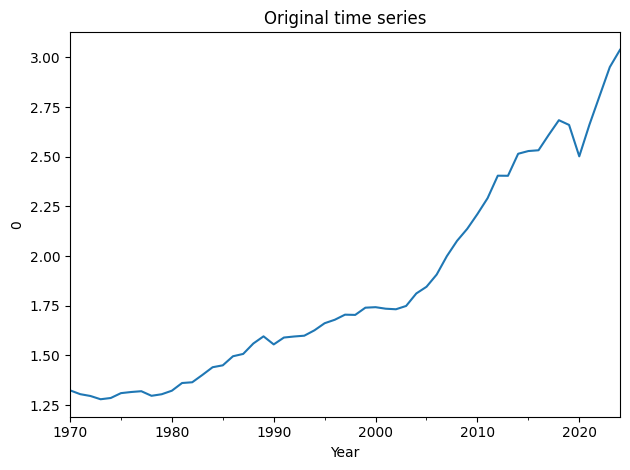

In [23]:
# Plot 1: Original series
plt.figure()
ts.plot(title="Original time series")
plt.xlabel("Year")
plt.ylabel(ts.name)
plt.tight_layout()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/original_time_series.png", dpi=150)
plt.show()


In [24]:
from statsmodels.regression.linear_model import OLS

# ---------- Structural breaks via piecewise linear ----------
# Work on numeric x as year integers
x = ts.index.year.astype(float)
y = ts.values.astype(float)

best_piece, all_piece_summary = fit_piecewise(y, x, max_breaks=2, min_seg=5)


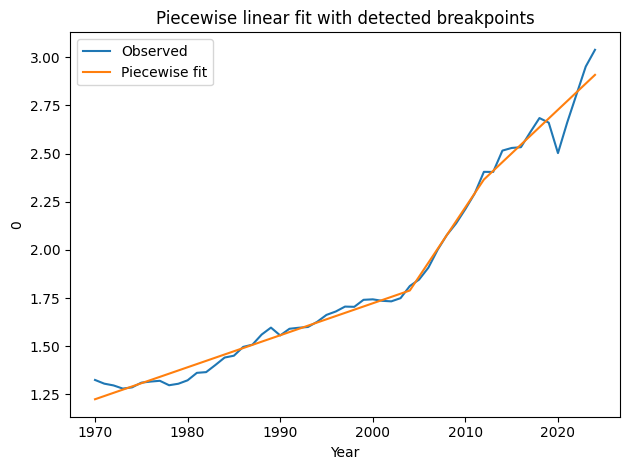

In [26]:
# Plot 2: Piecewise fitted trend on top of data
plt.figure()
plt.plot(ts.index, ts.values, label="Observed")
plt.plot(ts.index, best_piece["fitted"], label="Piecewise fit")
plt.title("Piecewise linear fit with detected breakpoints")
plt.xlabel("Year")
plt.ylabel(ts.name)
plt.legend()
plt.tight_layout()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/piecewise_fit.png", dpi=150)
plt.show()


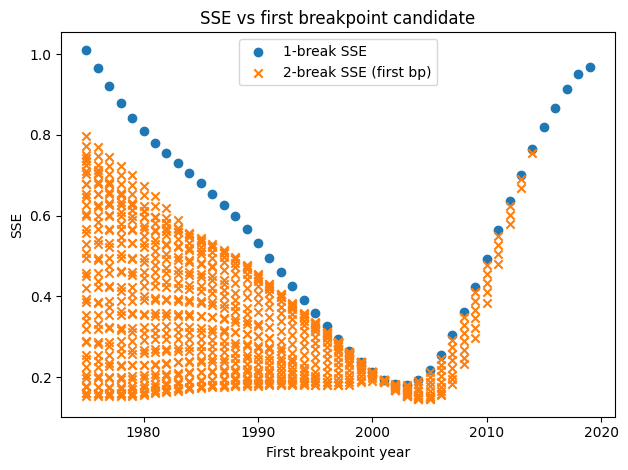

In [27]:
# Plot 3: RSS by first breakpoint (and second if present) — grid summary
# Build a simple heatmap-like scatter using matplotlib (single plot)
# Extract rows by number of breakpoints
one_bp = all_piece_summary[all_piece_summary["breakpoints"].apply(lambda x: len(x)==1)]
two_bp = all_piece_summary[all_piece_summary["breakpoints"].apply(lambda x: len(x)==2)]

plt.figure()
if not one_bp.empty:
    x1 = [bp[0] for bp in one_bp["breakpoints"]]
    y1 = one_bp["SSE"].values
    plt.scatter(x1, y1, label="1-break SSE")
if not two_bp.empty:
    x2 = [bp[0] for bp in two_bp["breakpoints"]]
    y2 = two_bp["SSE"].values
    plt.scatter(x2, y2, marker="x", label="2-break SSE (first bp)")
plt.title("SSE vs first breakpoint candidate")
plt.xlabel("First breakpoint year")
plt.ylabel("SSE")
plt.legend()
plt.tight_layout()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/piecewise_sse_vs_bp.png", dpi=150)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           5.36e-31
Time:                        04:52:30   Log-Likelihood:                 32.962
No. Observations:                  55   AIC:                            -59.92
Df Residuals:                      52   BIC:                            -53.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.2983      2.547    -21.316      0.0

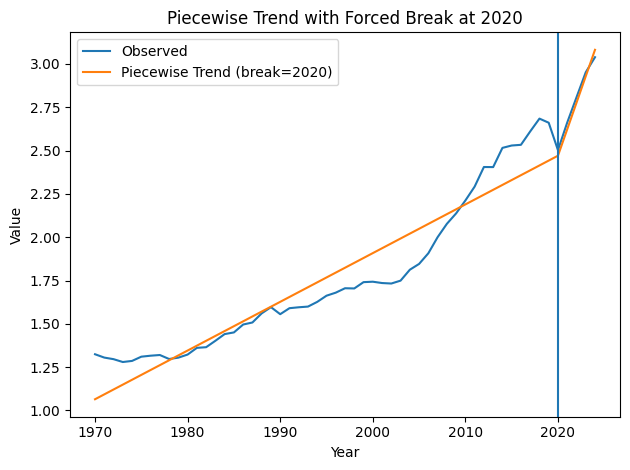

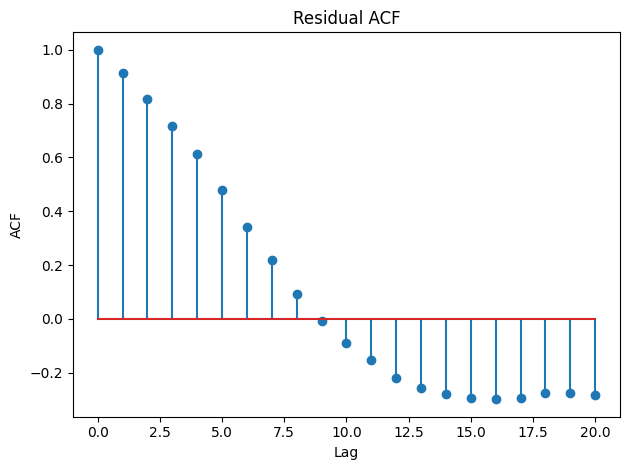

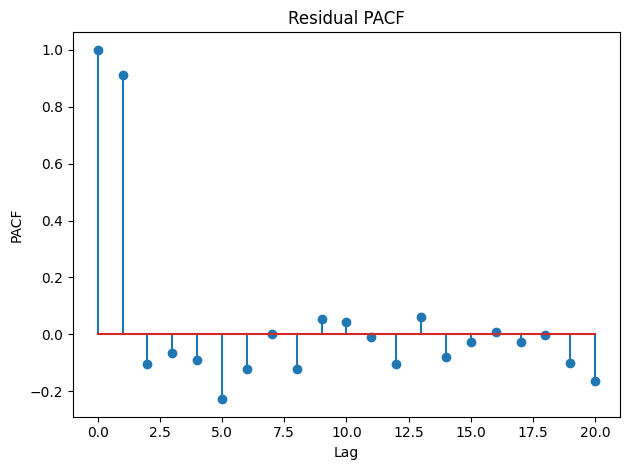

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  84.366
Date:                Sat, 08 Nov 2025   AIC                           -162.733
Time:                        04:52:31   BIC                           -156.766
Sample:                    01-01-1970   HQIC                          -160.432
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9876      0.025     39.816      0.000       0.939       1.036
ma.L1         -0.8640      0.071    -12.211      0.000      -1.003      -0.725
sigma2         0.0025      0.000      8.457      0.0

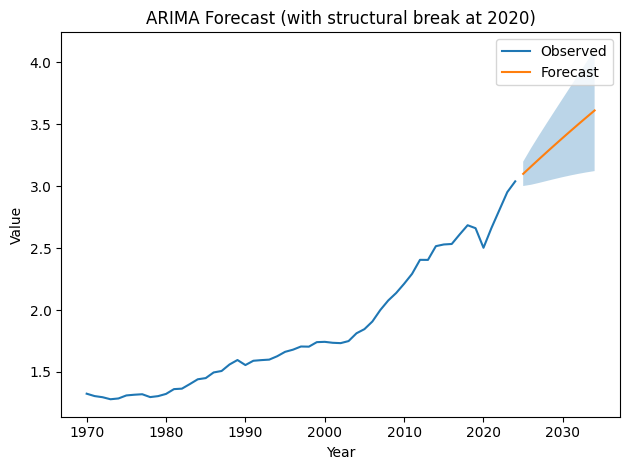

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

# -----------------------------
# 1. Load your time series
# -----------------------------
ts = ts.sort_index()                  # your series from screenshot
x = ts.index.year.astype(float)
y = ts.values.astype(float)

# -----------------------------
# 2. Forced breakpoint at 2020
# -----------------------------
def design_matrix(x, c):
    return np.column_stack([
        np.ones_like(x),                # const
        x,                              # trend
        np.maximum(0.0, x - c)          # hinge at 2020
    ])

forced_bp = 2020
X = design_matrix(x, forced_bp)

model = OLS(y, X).fit()
trend_fitted = model.fittedvalues
resid = y - trend_fitted

print(model.summary())

# -----------------------------
# 3. Plot trend fit
# -----------------------------
plt.figure()
plt.plot(ts.index, ts.values, label="Observed")
plt.plot(ts.index, trend_fitted, label="Piecewise Trend (break=2020)")
plt.axvline(pd.Timestamp("2020-01-01"))
plt.title("Piecewise Trend with Forced Break at 2020")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/forced_breakpoint_2020.png", dpi=150)
plt.show()

# -----------------------------
# 4. ACF & PACF of detrended residuals
# -----------------------------
lags = min(20, len(resid)-2)

acf_vals = acf(resid, nlags=lags, fft=True)
pacf_vals = pacf(resid, nlags=lags, method="ywm")

plt.figure()
plt.stem(range(len(acf_vals)), acf_vals, use_line_collection=True)
plt.title("Residual ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.show()

plt.figure()
plt.stem(range(len(pacf_vals)), pacf_vals, use_line_collection=True)
plt.title("Residual PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. ARIMA(ts) without exogenous regressors
# -----------------------------
# (No exog → robust, avoids earlier failures)
best_model = sm.tsa.arima.ARIMA(ts, order=(1,1,1)).fit()
print(best_model.summary())

# -----------------------------
# 6. Forecast
# -----------------------------
horizon = 10
forecast_res = best_model.get_forecast(steps=horizon)
f_mean = forecast_res.predicted_mean
f_ci = forecast_res.conf_int(alpha=0.05)

# -----------------------------
# 7. Forecast plot
# -----------------------------
plt.figure()
plt.plot(ts.index, ts.values, label="Observed")
plt.plot(f_mean.index, f_mean.values, label="Forecast")
plt.fill_between(f_ci.index, f_ci.iloc[:, 0], f_ci.iloc[:, 1], alpha=0.3)
plt.title("ARIMA Forecast (with structural break at 2020)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/arima_forecast.png", dpi=150)
plt.show()

# -----------------------------
# 8. Forecast table
# -----------------------------
forecast_table = pd.DataFrame({
    "forecast": f_mean,
    "lower_95": f_ci.iloc[:, 0],
    "upper_95": f_ci.iloc[:, 1]
})
forecast_table.to_csv("/home/karan/pyKaran/CarbonEmissions/Sheet2csv/arima_forecast_table.csv")


**Structural Breaks**

In [35]:
import itertools
# Utility functions
def rss_linear(y, X):
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    resid = y - X @ beta
    return float(resid.T @ resid), beta

def bic_from_rss(rss, n, k):
    # BIC = n*log(rss/n) + k*log(n)
    return n * np.log(rss / n) + k * np.log(n)

def design_matrix_with_breaks(t, breaks):
    # t is integer index 0..N-1
    # breaks is sorted list of break indices (exclusive): split at these indices
    # Piecewise linear with continuity at breaks ("broken-stick" with hinge functions)
    n = len(t)
    X = np.ones((n, 1))  # intercept
    # baseline linear trend
    X = np.column_stack([X, t])
    for b in breaks:
        # hinge term: (t - b)_+
        hinge = np.maximum(0, t - b)
        X = np.column_stack([X, hinge])
    return X

def exhaustive_break_search(y, max_breaks=3, min_seg=5):
    """
    Exhaustive search over combinations of breakpoints up to max_breaks.
    Uses BIC to select the best model among k=0..max_breaks breaks.
    Returns dict with best breaks, BIC, RSS and betas.
    """
    n = len(y)
    t = np.arange(n)
    best = {"breaks": [], "bic": np.inf, "rss": None, "betas": None}
    # Candidate break positions (indices between segments)
    candidates = list(range(min_seg, n - min_seg + 1))
    # Always evaluate k=0 (no breaks)
    X0 = design_matrix_with_breaks(t, [])
    rss0, beta0 = rss_linear(y, X0)
    bic0 = bic_from_rss(rss0, n, X0.shape[1])
    if bic0 < best["bic"]:
        best = {"breaks": [], "bic": bic0, "rss": rss0, "betas": beta0}
    # Evaluate k=1..max_breaks
    for k in range(1, max_breaks + 1):
        for combo in itertools.combinations(candidates, k):
            # Ensure minimum segment length between breaks
            valid = True
            prev = 0
            for b in combo + (n,):
                if b - prev < min_seg:
                    valid = False
                    break
                prev = b
            if not valid:
                continue
            X = design_matrix_with_breaks(t, list(combo))
            rss, betas = rss_linear(y, X)
            bic = bic_from_rss(rss, n, X.shape[1])
            if bic < best["bic"]:
                best = {"breaks": list(combo), "bic": bic, "rss": rss, "betas": betas}
    return best 

# Utility functions
def rss_linear(y, X):
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    resid = y - X @ beta
    return float(resid.T @ resid), beta

def bic_from_rss(rss, n, k):
    # BIC = n*log(rss/n) + k*log(n)
    return n * np.log(rss / n) + k * np.log(n)

def design_matrix_with_breaks(t, breaks):
    # t is integer index 0..N-1
    # breaks is sorted list of break indices (exclusive): split at these indices
    # Piecewise linear with continuity at breaks ("broken-stick" with hinge functions)
    n = len(t)
    X = np.ones((n, 1))  # intercept
    # baseline linear trend
    X = np.column_stack([X, t])
    for b in breaks:
        # hinge term: (t - b)_+
        hinge = np.maximum(0, t - b)
        X = np.column_stack([X, hinge])
    return X

def exhaustive_break_search(y, max_breaks=3, min_seg=5):
    """
    Exhaustive search over combinations of breakpoints up to max_breaks.
    Uses BIC to select the best model among k=0..max_breaks breaks.
    Returns dict with best breaks, BIC, RSS and betas.
    """
    n = len(y)
    t = np.arange(n)
    best = {"breaks": [], "bic": np.inf, "rss": None, "betas": None}
    # Candidate break positions (indices between segments)
    candidates = list(range(min_seg, n - min_seg + 1))
    # Always evaluate k=0 (no breaks)
    X0 = design_matrix_with_breaks(t, [])
    rss0, beta0 = rss_linear(y, X0)
    bic0 = bic_from_rss(rss0, n, X0.shape[1])
    if bic0 < best["bic"]:
        best = {"breaks": [], "bic": bic0, "rss": rss0, "betas": beta0}
    # Evaluate k=1..max_breaks
    for k in range(1, max_breaks + 1):
        for combo in itertools.combinations(candidates, k):
            # Ensure minimum segment length between breaks
            valid = True
            prev = 0
            for b in combo + (n,):
                if b - prev < min_seg:
                    valid = False
                    break
                prev = b
            if not valid:
                continue
            X = design_matrix_with_breaks(t, list(combo))
            rss, betas = rss_linear(y, X)
            bic = bic_from_rss(rss, n, X.shape[1])
            if bic < best["bic"]:
                best = {"breaks": list(combo), "bic": bic, "rss": rss, "betas": betas}
    return best

In [36]:
def chow_test_at_year(ts, year):
    # Build OLS with and without interactions
    y = ts.values
    t = np.arange(len(ts))
    # Dummy for post-break
    d = (ts.index.year > year).astype(int)
    # Model with different intercept and slope after break
    X = np.column_stack([np.ones(len(t)), t, d, d * t])
    ols_full = sm.OLS(y, X).fit()
    # Restricted (no break): common intercept & slope
    Xr = sm.add_constant(t)
    ols_restr = sm.OLS(y, Xr).fit()
    # Chow F-stat manually
    rss_r = sum(ols_restr.resid**2)
    rss_u = sum(ols_full.resid**2)
    k = X.shape[1] - Xr.shape[1]  # added parameters
    n = len(y)
    f_stat = ((rss_r - rss_u) / k) / (rss_u / (n - X.shape[1]))
    from scipy.stats import f
    p_val = 1 - f.cdf(f_stat, k, n - X.shape[1])
    return {"F": float(f_stat), "p_value": float(p_val), "restricted_rss": float(rss_r),
            "unrestricted_rss": float(rss_u)}

chow_2020 = chow_test_at_year(ts, 2019)  

In [37]:
#(2) Automatic breakpoint detection (BIC-based, Bai–Perron style)

best_breaks = exhaustive_break_search(ts.values, max_breaks=3, min_seg=5)
detected_break_indices = best_breaks["breaks"]
detected_break_years = [int(ts.index[b].year) for b in detected_break_indices]

# Build fitted piecewise curve
t = np.arange(len(ts))
X_best = design_matrix_with_breaks(t, detected_break_indices)
yhat_piecewise = X_best @ best_breaks["betas"]


In [38]:
# 3) ARIMA trained separately on each regime & Final forecast

def aic_search_arima(series, p_range=range(0,4), d_range=range(0,3), q_range=range(0,4)):
    best = {"aic": np.inf, "order": None, "fit": None}
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    fit = ARIMA(series, order=(p,d,q)).fit()
                    if fit.aic < best["aic"]:
                        best = {"aic": fit.aic, "order": (p,d,q), "fit": fit}
                except Exception:
                    continue
    return best

# Split regimes using detected breaks
all_breaks = detected_break_indices + [len(ts)]
start = 0
regimes = []
for b in all_breaks:
    seg = ts.iloc[start:b]
    regimes.append((start, b, seg))
    start = b

regime_info = []
for i, (s, e, seg) in enumerate(regimes, 1):
    best = aic_search_arima(seg)
    regime_info.append({
        "Regime": i,
        "Start_Year": int(seg.index[0].year),
        "End_Year": int(seg.index[-1].year),
        "Order": best["order"],
        "AIC": best["aic"]
    })

# Forecast next 10 years from last regime model
last_seg = regimes[-1][2]
last_best = aic_search_arima(last_seg)
fit_last = last_best["fit"]
steps = 10
fc_res = fit_last.get_forecast(steps=steps)
fc_mean = fc_res.predicted_mean
fc_ci = fc_res.conf_int(alpha=0.05)
future_years = pd.date_range(ts.index[-1] + pd.offsets.YearBegin(1), periods=steps, freq="YS")
forecast_df = pd.DataFrame({
    "Year": future_years.year,
    "Forecast": np.round(fc_mean.values, 3),
    "Lower_95": np.round(fc_ci.iloc[:,0].values, 3),
    "Upper_95": np.round(fc_ci.iloc[:,1].values, 3),
})

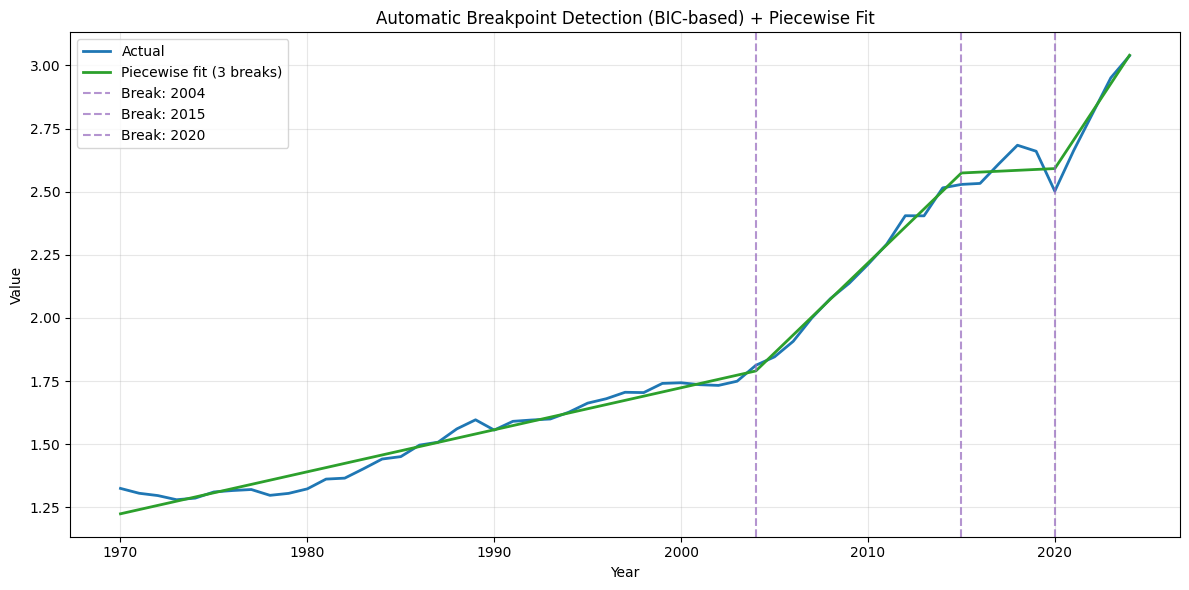

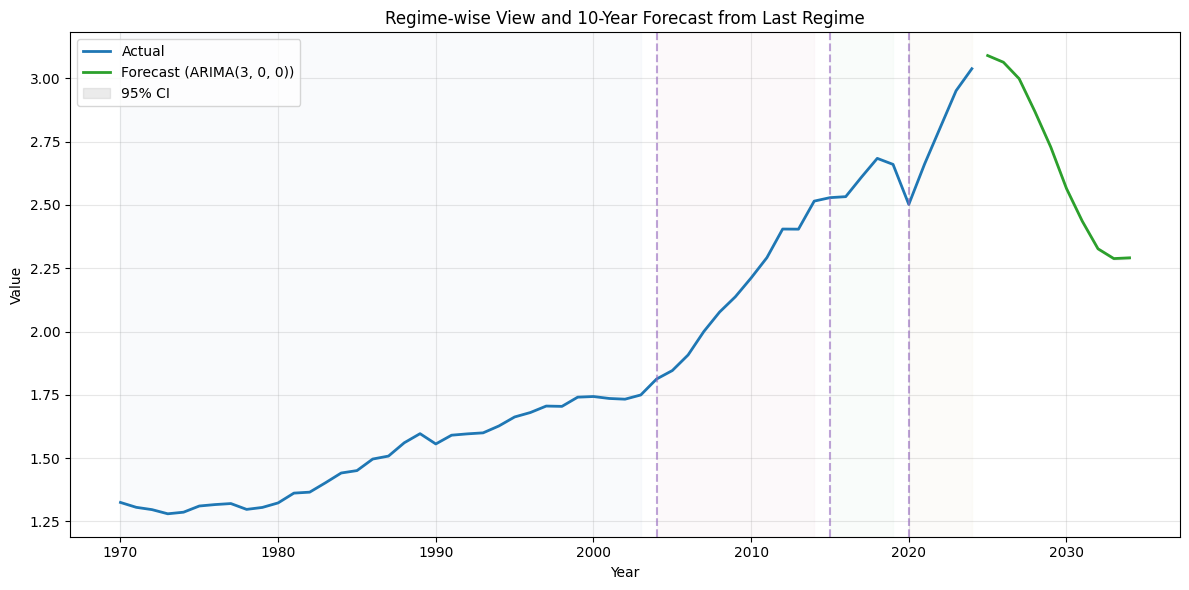

('/home/karan/pyKaran/CarbonEmissions/Sheet2csv/chow_test_2020.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet2csv/detected_breaks.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet2csv/regime_arima_summary.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet2csv/final_forecast_10y_from_last_regime.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/breaks_piecewise_fit.png',
 '/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/regimes_and_forecast.png',
 [2004, 2015, 2020])

In [39]:
# Plots (corporate style)

c_actual = "#1f77b4"; c_piece = "#2ca02c"; c_break = "#9467bd"; c_fc = "#2ca02c"; c_ci = "#7f7f7f"

# Plot A: Piecewise fit with detected breaks
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label="Actual", color=c_actual, linewidth=2)
plt.plot(ts.index, yhat_piecewise, label=f"Piecewise fit ({len(detected_break_indices)} breaks)", color=c_piece, linewidth=2)
for b in detected_break_indices:
    year = ts.index[b].year
    plt.axvline(ts.index[b], color=c_break, linestyle="--", alpha=0.7, label=f"Break: {year}")
plt.title("Automatic Breakpoint Detection (BIC-based) + Piecewise Fit")
plt.xlabel("Year"); plt.ylabel("Value")
plt.grid(alpha=0.3)
# Avoid duplicate legend entries for multiple breaks
handles, labels = plt.gca().get_legend_handles_labels()
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plot_piece_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/breaks_piecewise_fit.png"
plt.savefig(plot_piece_path, dpi=150)
plt.show()

# Plot B: Regimes + final 10-year forecast from last regime ARIMA
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label="Actual", color=c_actual, linewidth=2)
# Regime shading
prev = 0
colors = ["#E8EEF7", "#F7E8EF", "#E8F7EF", "#F7F3E8"]
for i, b in enumerate(all_breaks):
    plt.axvspan(ts.index[prev], ts.index[b-1], color=colors[i % len(colors)], alpha=0.25)
    prev = b
# Forecast with CI
plt.plot(future_years, fc_mean.values, color=c_fc, linewidth=2, label=f"Forecast (ARIMA{last_best['order']})")
plt.fill_between(future_years, fc_ci.iloc[:,0].values, fc_ci.iloc[:,1].values, color=c_ci, alpha=0.15, label="95% CI")
for b in detected_break_indices:
    plt.axvline(ts.index[b], color=c_break, linestyle="--", alpha=0.6)
plt.title("Regime-wise View and 10-Year Forecast from Last Regime")
plt.xlabel("Year"); plt.ylabel("Value")
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout()
plot_regime_fc_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/regimes_and_forecast.png"
plt.savefig(plot_regime_fc_path, dpi=150)
plt.show()

# -----------------------------
# Tables to download
# -----------------------------
# Chow result
chow_df = pd.DataFrame([chow_2020])
chow_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2csv/chow_test_2020.csv"
chow_df.to_csv(chow_path, index=False)

# Detected breaks
breaks_df = pd.DataFrame({
    "Break_Index": detected_break_indices,
    "Break_Year": detected_break_years
})
breaks_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2csv/detected_breaks.csv"
breaks_df.to_csv(breaks_path, index=False)

# Regime ARIMA table
regimes_df = pd.DataFrame(regime_info)
regimes_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2csv/regime_arima_summary.csv"
regimes_df.to_csv(regimes_path, index=False)

# Forecast table
forecast_path = "/home/karan/pyKaran/CarbonEmissions/Sheet2csv/final_forecast_10y_from_last_regime.csv"
forecast_df.to_csv(forecast_path, index=False)


(chow_path, breaks_path, regimes_path, forecast_path, plot_piece_path, plot_regime_fc_path, detected_break_years)


**Custom Intervals**

In [40]:
# Custom intervals
intervals = [
    ("1990", "2008"),
    ("2008", "2012"),
    ("2012", "2017"),
    ("2017", "2024")
]

results = []
interval_trends = {}

# Fit trend (linear regression) for each interval
for start, end in intervals:
    segment = ts[start:end]
    y = segment.values
    t = np.arange(len(segment)).reshape(-1, 1)

    # Fit regression
    reg = LinearRegression().fit(t, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    r2 = reg.score(t, y)

    # Statsmodels for p-value
    X = sm.add_constant(t)
    model = sm.OLS(y, X).fit()
    p_value = model.pvalues[1]

    results.append({
        "Interval": f"{start}-{end}",
        "Slope": slope,
        "Intercept": intercept,
        "R²": r2,
        "Slope p-value": p_value,
        "Avg Annual Growth": slope
    })

    interval_trends[(start, end)] = (segment.index, segment.values, slope, intercept)

# Convert to DataFrame
trend_table = pd.DataFrame(results)
trend_table_path = "/home/karan/pyKaran/CarbonEmissions/Sheet1csv/interval_trend_analysis.csv"
trend_table.to_csv(trend_table_path, index=False)
print(trend_table)


    Interval     Slope  Intercept        R²  Slope p-value  Avg Annual Growth
0  1990-2008  0.023087   1.532355  0.874113   4.530372e-09           0.023087
1  2008-2012  0.081026   2.062506  0.986016   7.047765e-04           0.081026
2  2012-2017  0.040736   2.397552  0.894084   4.364874e-03           0.040736
3  2017-2024  0.058731   2.533847  0.637554   1.749437e-02           0.058731


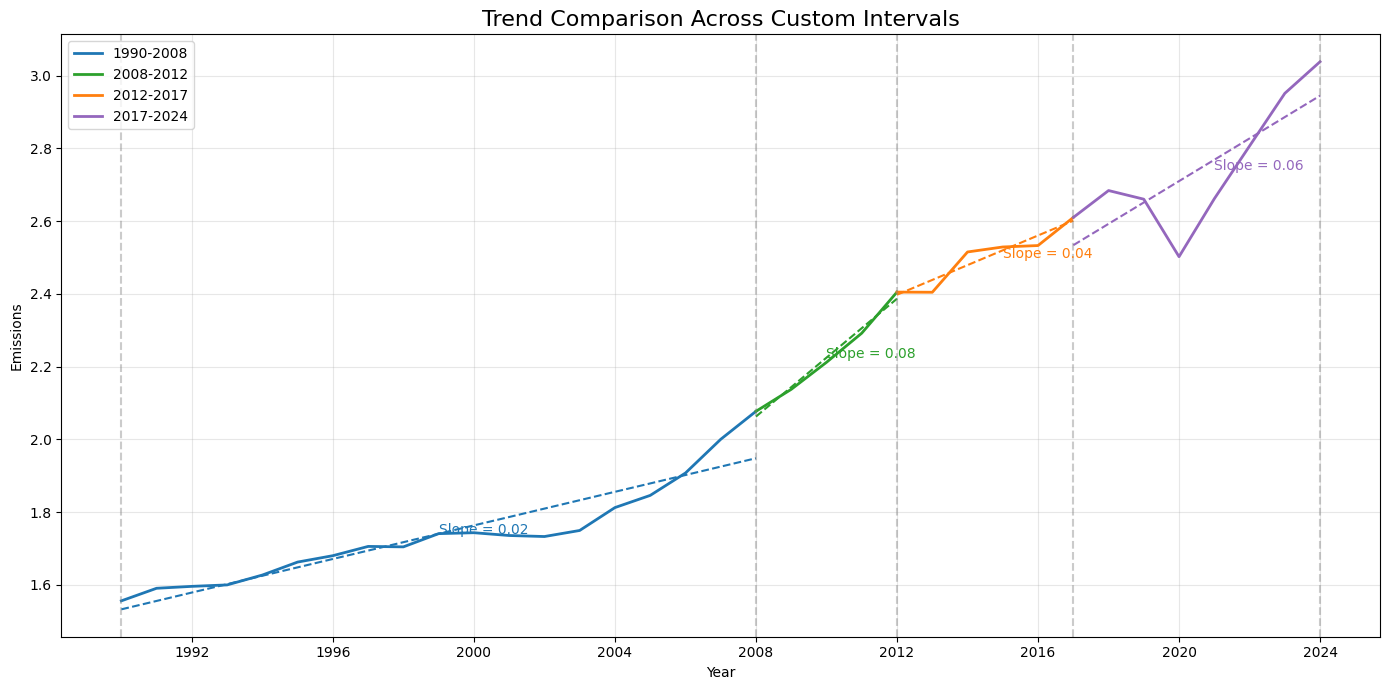

In [41]:
# Corporate colors
colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"]

plt.figure(figsize=(14,7))
for i, (start, end) in enumerate(intervals):
    idx, vals, slope, intercept = interval_trends[(start, end)]
    t = np.arange(len(vals))
    y_hat = intercept + slope * t

    plt.plot(idx, vals, color=colors[i], linewidth=2, label=f"{start}-{end}")
    plt.plot(idx, y_hat, color=colors[i], linestyle="--")

    # Label slope on plot
    mid = idx[len(idx)//2]
    plt.text(mid, np.mean(vals), f"Slope = {slope:.2f}", color=colors[i], fontsize=10)

# Vertical lines at boundaries
bounds = ["1990", "2008", "2012", "2017", "2024"]
for b in bounds:
    plt.axvline(pd.to_datetime(b), color="#7f7f7f", linestyle="--", alpha=0.4)

plt.title("Trend Comparison Across Custom Intervals", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
pp = "/home/karan/pyKaran/CarbonEmissions/Sheet2Plots/trend_comparison_intervals.png"
plt.savefig(pp, dpi=150)
plt.show()
